In [137]:
import pandas as pd

In [138]:
#Loading Data
data1=pd.read_csv('exported_q2.csv')

In [139]:
data1.head()

,converted_created_at,category,price,raw_content,location.city
0,1716237544000,"کالای دیجیتال, موبایل و تبلت, موبایل, samsung,...",3200000,سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز
1,1716237624000,"کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi, ...",3700000,شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد
2,1716237078000,"کالای دیجیتال, موبایل و تبلت, موبایل, nokia, 5...",1111111,خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام
3,1716237368000,"کالای دیجیتال, موبایل و تبلت, موبایل, samsung,...",2300000,سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند
4,1716237962000,"کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi",14000000,گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران


In [140]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459962 entries, 0 to 459961
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   converted_created_at  459962 non-null  int64 
 1   category              459962 non-null  object
 2   price                 459962 non-null  int64 
 3   raw_content           459962 non-null  object
 4   location.city         459962 non-null  object
dtypes: int64(2), object(3)
memory usage: 17.5+ MB


In [141]:
#First, the Unix time was converted to Gregorian date and time, then it was converted to the Jalali (Shamsi) date.
import jdatetime
from datetime import datetime
data1['datetime']= data1['converted_created_at'].apply(lambda x: jdatetime.datetime.fromgregorian(datetime=datetime.utcfromtimestamp(x / 1000)))
data1.drop(columns=['converted_created_at'], inplace=True)
data1.head()


C:\Users\sepideh\AppData\Local\Temp\ipykernel_7824\1837596220.py:4: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  data1['datetime']= data1['converted_created_at'].apply(lambda x: jdatetime.datetime.fromgregorian(datetime=datetime.utcfromtimestamp(x / 1000)))


,category,price,raw_content,location.city,datetime
0,"کالای دیجیتال, موبایل و تبلت, موبایل, samsung,...",3200000,سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31 20:39:04
1,"کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi, ...",3700000,شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31 20:40:24
2,"کالای دیجیتال, موبایل و تبلت, موبایل, nokia, 5...",1111111,خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31 20:31:18
3,"کالای دیجیتال, موبایل و تبلت, موبایل, samsung,...",2300000,سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31 20:36:08
4,"کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi",14000000,گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31 20:46:02


In [142]:
#Display some values from the "Category" column.
data1['category'].iloc[7865:7873].to_list()

['کالای دیجیتال, موبایل و تبلت, موبایل, apple, iphone 14',
 'کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi, poco x3 gt',
 'کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi, mi 5s',
 'کالای دیجیتال, موبایل و تبلت, موبایل',
 'کالای دیجیتال, موبایل و تبلت, موبایل, apple, iphone 13',
 'کالای دیجیتال, موبایل و تبلت, موبایل, honor, x8',
 'کالای دیجیتال, موبایل و تبلت, موبایل, samsung, galaxy j7',
 'کالای دیجیتال, موبایل و تبلت, موبایل, xiaomi, poco x4 pro 5g']

In [143]:
#**Split the values in the "category" column by a comma (,)
split_columns=data1['category'].str.split(',', expand=True)
split_columns.columns=[f'category_{i+1}' for i in range(split_columns.shape[1])]
data1 = pd.concat([data1, split_columns], axis=1)
data1.drop(columns=['category'] , inplace=True)
data1.head()


,price,raw_content,location.city,datetime,category_1,category_2,category_3,category_4,category_5
0,3200000,سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31 20:39:04,کالای دیجیتال,موبایل و تبلت,موبایل,samsung,galaxy a22 5g
1,3700000,شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31 20:40:24,کالای دیجیتال,موبایل و تبلت,موبایل,xiaomi,redmi note 8
2,1111111,خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31 20:31:18,کالای دیجیتال,موبایل و تبلت,موبایل,nokia,5800 xpressmusic
3,2300000,سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31 20:36:08,کالای دیجیتال,موبایل و تبلت,موبایل,samsung,galaxy j5 prime
4,14000000,گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31 20:46:02,کالای دیجیتال,موبایل و تبلت,موبایل,xiaomi,None


In [144]:
data1['category_1'].unique()

array(['کالای دیجیتال'], dtype=object)

In [145]:
data1['category_2'].unique()

array([' موبایل و تبلت'], dtype=object)

In [146]:
data1['category_3'].unique()

array([' موبایل'], dtype=object)

In [147]:
data1.drop(columns=['category_1','category_2','category_3'],inplace=True)

In [148]:
data1.rename(columns={'category_4':'brand' , 'category_5':'model'} , inplace=True)

In [149]:
#Insert Null values  "brand" and "model" columns in df_null_brands 
df_null_brands = data1[data1["brand"].isna()][["brand", "model"]]
print(df_null_brands)

       brand model
20      None  None
78      None  None
101     None  None
161     None  None
165     None  None
...      ...   ...
435628  None  None
436478  None  None
437104  None  None
437365  None  None
437379  None  None

[14887 rows x 2 columns]


In [150]:
#Count number of null values in the "brand" and "model" columns.
data1[(data1["brand"].isna()) & (data1["model"].isna())].shape[0]

14887

In [151]:
#Display index numbers of the null values in the "brand" column.
nullbrans=data1[data1['brand'].isna()].index
nullbrans=nullbrans.tolist()
print(nullbrans)

[20, 78, 101, 161, 165, 166, 168, 279, 298, 344, 345, 362, 402, 405, 483, 486, 495, 502, 527, 567, 627, 652, 722, 769, 776, 805, 854, 857, 858, 864, 947, 958, 969, 975, 992, 1049, 1053, 1075, 1152, 1285, 1325, 1329, 1331, 1332, 1346, 1353, 1396, 1398, 1401, 1435, 1466, 1470, 1480, 1485, 1504, 1514, 1566, 1572, 1579, 1606, 1644, 1649, 1656, 1717, 1751, 1758, 1760, 1767, 1782, 1884, 1962, 2004, 2009, 2050, 2072, 2085, 2086, 2100, 2110, 2111, 2123, 2135, 2141, 2191, 2221, 2251, 2253, 2278, 2279, 2305, 2322, 2330, 2363, 2428, 2461, 2518, 2546, 2591, 2600, 2620, 2640, 2642, 2658, 2678, 2709, 2711, 2716, 2761, 2778, 2840, 2860, 2871, 2876, 2902, 2913, 2917, 2923, 2938, 2995, 3034, 3036, 3053, 3063, 3064, 3070, 3090, 3119, 3152, 3153, 3174, 3175, 3197, 3208, 3234, 3235, 3249, 3250, 3353, 3411, 3421, 3494, 3513, 3543, 3563, 3599, 3637, 3653, 3659, 3662, 3668, 3678, 3686, 3688, 3689, 3695, 3699, 3740, 3741, 3759, 3775, 3838, 3843, 3873, 3887, 3907, 3914, 3937, 4005, 4090, 4091, 4096, 4099, 4109

In [152]:
data1['raw_content'].iloc[85572:85580].to_list()

['گوشی OPPO  A58|موبایل|اهواز، زیتون کارمندی|خرید و فروش گوشی در حد نو دو ماه پیش خریدم رم 6 وحافظه 128 با ضمانت شرکتی تعویض شش ماهه و بیمه یکسال که دو ماه از آن مدت گذشته دارای قاپ شیشه ای وشارژ  باتشکر| سایت ثبت آگهی، نیازمندی و خرید و فروش دیوار',
 'اپل iPhone 13 Pro Max ۲۵۶ گیگابایت|موبایل|فرخ\u200cشهر|خرید و فروش گوشی آیفون ۱۳ پرو مکس سفید دو سیم کارت zaa.نو آنباکس نشده .هر چی قیمت نو بازار هست ۱۰ تومن کمتر .رنگش سفیده چون دیوار رنگ سفید نداشت نقره ای انتخاب کردم| سایت ثبت آگهی، نیازمندی و خرید و فروش دیوار',
 'سامسونگ Galaxy S24 Ultra ۲۵۶ گیگابایت|موبایل|بیرجند|خرید و فروش سلام گوشی یک ماه گرفتم پول لازمم مشتری نقد پیام بده گارد گلس داره 17گارانتی داره| سایت ثبت آگهی، نیازمندی و خرید و فروش دیوار',
 'آنر 50 Lite ۱۲۸ گیگابایت|موبایل|اسلام\u200cشهر|خرید و فروش گوشی در حد نو +جعبه شارژر انتقال مالکیت نسیم شهر در خدمتم| سایت ثبت آگهی، نیازمندی و خرید و فروش دیوار',
 'ایفون ۱۳ پرومکس|موبایل|کرج، آزادگان|خرید و فروش با سلام \npart number LLA \nseries M \nجعبه ریپک \nبدون بازشدگی تعمیر 

In [153]:
data1.loc[85572]

price                                                      5800000
raw_content      گوشی OPPO  A58|موبایل|اهواز، زیتون کارمندی|خری...
location.city                                                اهواز
datetime                                       1403-04-22 03:33:40
brand                                                         None
model                                                         None
Name: 85572, dtype: object

In [154]:
#Label "apple" brand for values in the "raw_content" column that contain specific words from the "keywords_apple" list.
keywords_apple = ['آیفون', 'ایفون', 'iphone', 'apple', 'اپل']
data1.loc[data1['brand'].isna() & data1['raw_content'].str.contains('|'.join(keywords_apple),case=False, na=False),'brand']='apple'


In [155]:
data1['brand'].isnull().sum()

13744

In [156]:
#Label "samsung brand for values in the "raw_content" column that contain specific words from the "keywords_samsung" list.
keywords_samsung = ['سامسونگ', 'samsong', 'samsung', 'galaxy', 'Galaxy']
data1.loc[data1['brand'].isna() & data1['raw_content'].str.contains('|'.join(keywords_samsung),case=False, na=False),'brand'] = 'samsung'

In [157]:
data1['brand'].isnull().sum()

12040

In [158]:
#Label "xiaomi" brand for values in the "raw_content" column that contain specific words from the "keywords_xiaomi" list.
keywords_xiaomi = ['xiaomi', 'xiami', 'xiomi', 'Redmi', 'redmi','شیامی','شیومی','ردمی']
data1.loc[data1['brand'].isna() & data1['raw_content'].str.contains('|'.join(keywords_xiaomi),case=False, na=False),'brand']='xiaomi'

In [159]:
data1['brand'].isnull().sum()

11270

In [160]:
#Remove other null values.
data1=data1.dropna(subset=['brand'])

In [161]:
data1['brand'].isnull().sum()

0

In [162]:
data1.to_csv('exported_cleaning__1.csv' , index=False, encoding="utf-8-sig")

In [163]:
data2=pd.read_csv('exported_cleaning__1.csv')

In [164]:
data2.head()

,price,raw_content,location.city,datetime,brand,model
0,3200000,سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31 20:39:04,samsung,galaxy a22 5g
1,3700000,شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31 20:40:24,xiaomi,redmi note 8
2,1111111,خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31 20:31:18,nokia,5800 xpressmusic
3,2300000,سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31 20:36:08,samsung,galaxy j5 prime
4,14000000,گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31 20:46:02,xiaomi,NaN


In [165]:
#convert prices to a format with three digits separated by comma
data2['price'].apply(lambda x: f'{x:,.0f}')

0          3,200,000
1          3,700,000
2          1,111,111
3          2,300,000
4         14,000,000
             ...    
448687         1,111
448688       650,000
448689     8,500,000
448690     1,000,000
448691     2,000,000
Name: price, Length: 448692, dtype: object

Viewing statistical information of the price column for major brands

In [166]:
price_stats=data2[data2['brand']=='samsung']['price'].describe()
price_stats.apply(lambda x: f'{x:,.0f}')

count             1,704
mean         39,293,682
std         799,780,265
min               1,000
25%             850,000
50%           2,211,111
75%           5,762,500
max      28,500,000,768
Name: price, dtype: object

In [167]:
price_stats=data2[data2['brand']=='apple']['price'].describe()
price_stats.apply(lambda x: f'{x:,.0f}')

count             1,143
mean         28,913,697
std         332,520,683
min                   0
25%           1,850,000
50%           7,000,000
75%          23,416,666
max      11,111,110,656
Name: price, dtype: object

In [168]:
price_stats=data2[data2['brand']=='xiaomi']['price'].describe()
price_stats.apply(lambda x: f'{x:,.0f}')

count              770
mean         9,493,363
std         54,246,319
min              1,000
25%          3,500,000
50%          5,600,000
75%          8,500,000
max      1,122,345,728
Name: price, dtype: object

In [169]:
print(data2['brand'].unique())

[' samsung' ' xiaomi' ' nokia' ' apple' ' huawei' 'apple' ' honor' ' cat'
 ' infinix' ' vivo' ' glx' 'samsung' ' amazon' ' lg' 'xiaomi'
 ' sony ericsson' ' sony' ' lenovo' ' gplus' ' realme' ' panasonic'
 ' asus' ' oneplus' ' gionee' ' motorola' ' wiko' ' oppo' ' gigabyte'
 ' tecno' ' blackberry' ' energizer' ' acer' ' alcatel' ' archos' ' lava'
 ' google' ' htc' ' bq' ' meizu' ' microsoft' ' philips' ' zte' ' allview'
 ' micromax' ' sonim' ' sharp' ' prestigio' ' blu' ' tcl' ' razer' ' yota'
 ' others' ' samsung galaxy z flip' ' nothing']


In [171]:
data2['model'] = data2['model'].str.strip()
data2['brand'] = data2['brand'].str.strip()

In [130]:
print(data2['brand'].unique())

['samsung' 'xiaomi' 'nokia' 'apple' 'huawei' 'honor' 'cat' 'infinix'
 'vivo' 'glx' 'amazon' 'lg' 'sony ericsson' 'sony' 'lenovo' 'gplus'
 'realme' 'panasonic' 'asus' 'oneplus' 'gionee' 'motorola' 'wiko' 'oppo'
 'gigabyte' 'tecno' 'blackberry' 'energizer' 'acer' 'alcatel' 'archos'
 'lava' 'google' 'htc' 'bq' 'meizu' 'microsoft' 'philips' 'zte' 'allview'
 'micromax' 'sonim' 'sharp' 'prestigio' 'blu' 'tcl' 'razer' 'yota'
 'others' 'samsung galaxy z flip' 'nothing']


In [132]:
data2[data2['brand']=='apple']['model'].unique()

array(['iphone 6s', 'iphone 12 pro max', 'iphone 15 pro max', 'iphone 7',
       nan, 'iphone 7 plus', 'iphone 12 pro', 'iphone 13',
       'iphone 13 pro max', 'iphone 6', 'iphone 11', 'iphone 14 pro max',
       'iphone se', 'iphone se (2020)', 'iphone 6 plus', 'iphone 11 pro',
       'iphone 13 pro', 'iphone 14 pro', 'iphone 4', 'iphone x',
       'iphone 15', 'iphone xs', 'iphone 15 pro', 'iphone 12', 'iphone 8',
       'iphone 5s', 'iphone 8 plus', 'iphone 6s plus',
       'iphone 11 pro max', 'iphone xs max', 'iphone 13 mini', 'iphone 5',
       'iphone 12 mini', 'iphone 14', 'iphone 15 plus', 'iphone 4s',
       'iphone xr', 'iphone 5c', 'iphone 14 plus', 'iphone se (2022)',
       'ipad 10.2 (2020)', 'iphone 4 cdma', 'ipad air (2020)',
       'apple iphone 15', 'apple iphone 13', 'apple iphone x',
       'apple iphone 13 pro max', 'apple iphone 12',
       'apple iphone 15 pro max', 'apple iphone se (2020)',
       'apple iphone 7 plus', 'apple iphone 14 pro max', 'apple iphone

In [172]:
#Remove duplicate entries in the "model" column for the "apple" brand.
data2['model']= data2['model'].str.replace('apple', '', case=False, regex=True)
data2['model']= data2['model'].str.replace('iphone', '', case=False, regex=True)

In [173]:
data2[data2['brand']=='apple']['model'].unique()

array([' 6s', ' 12 pro max', ' 15 pro max', ' 7', nan, ' 7 plus',
       ' 12 pro', ' 13', ' 13 pro max', ' 6', ' 11', ' 14 pro max', ' se',
       ' se (2020)', ' 6 plus', ' 11 pro', ' 13 pro', ' 14 pro', ' 4',
       ' x', ' 15', ' xs', ' 15 pro', ' 12', ' 8', ' 5s', ' 8 plus',
       ' 6s plus', ' 11 pro max', ' xs max', ' 13 mini', ' 5', ' 12 mini',
       ' 14', ' 15 plus', ' 4s', ' xr', ' 5c', ' 14 plus', ' se (2022)',
       'ipad 10.2 (2020)', ' 4 cdma', 'ipad air (2020)', '  15', '  13',
       '  x', '  13 pro max', '  12', '  15 pro max', '  se (2020)',
       '  7 plus', '  14 pro max', '  5', '  xs', '  6s', '  15 plus',
       '  se', '  11', '  12 pro', '  8 plus', '  7', '  8', '  6s plus',
       '  13 pro', '  12 pro max', '  11 pro', '  14', '  11 pro max',
       '  15 pro', '  6 plus', '  6', '  14 plus', '  14 pro',
       '  12 mini', '  xs max', '  5s', '  xr', '  4', '  13 mini',
       '  5c', '  4s', '  se (2022)', ' ipad 10.2 (2020)', '  4 cdma',
       ' ip

In [179]:
#Remove spaces from the model names of the "apple" brand.
data2['model']= data2['model'].str.strip()
data2['brand']= data2['brand'].str.strip()

In [180]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448692 entries, 0 to 448691
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          448692 non-null  int64 
 1   raw_content    448692 non-null  object
 2   location.city  448692 non-null  object
 3   datetime       448692 non-null  object
 4   brand          448692 non-null  object
 5   model          408550 non-null  object
dtypes: int64(1), object(5)
memory usage: 20.5+ MB


In [181]:
#Remove spaces from the beginning and end of the "price" column.
data2['price']=data2['price'].astype(str).str.strip()

In [182]:
#Convert the "price" column to the float data type.
data2['price']= data2['price'].astype(float)

In [183]:
data2[data2['brand']=="apple"]['price'].describe()

count    1.306630e+05
mean     5.045987e+07
std      6.580448e+08
min      0.000000e+00
25%      1.000000e+07
50%      2.990000e+07
75%      4.700000e+07
max      5.000000e+10
Name: price, dtype: float64

From now on, for each iPhone model, I found the minimum and maximum prices and removed the prices outside this range for each model. The reason I didn't remove the outliers for all models at once is due to the prices of newer brands, which were much higher than those of older brands. Since newer models were also very important and their prices had to be considered in the analysis, more sensitivity was applied in this process.
This way, less data was removed from each model.

In [185]:
data2=data2[~((data2['brand'] == 'apple') & 
                          (data2['model'] == '6s') & 
                          ((data2['price'] > 12000000) | 
                           (data2['price'] < 1000000)))]

In [186]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '12 pro max') & 
               ((data2['price'] > 63000000) | 
               (data2['price'] < 18000000)))]

In [187]:
data2=data2[~((data2['brand'] == 'apple') & 
                (data2['model'] == '16 pro max') & 
                ((data2['price'] > 215000000) | (data2['price'] < 70000000)))]

In [188]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '15 pro max') & 
                ((data2['price'] > 120000000) | 
               (data2['price'] < 45000000)))]

In [189]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '7') & 
               ((data2['price'] > 8000000) | 
               (data2['price'] < 2000000)))]

In [190]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '7 plus') & 
               ((data2['price'] > 15000000) | 
               (data2['price'] < 3000000)))]

In [191]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '12 pro') & 
               ((data2['price'] > 95000000) | 
               (data2['price'] < 3000000)))]

In [192]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '13') & 
               ((data2['price'] > 75000000) | 
               (data2['price'] < 2600000)))]

In [193]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '13 pro max') & 
               ((data2['price'] > 170000000) | 
               (data2['price'] < 2600000)))]

In [194]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '6') & 
               ((data2['price'] > 8000000) | 
               (data2['price'] < 1000000)))]

In [195]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '11') & 
               ((data2['price'] > 35000000) | 
               (data2['price'] < 10000000)))]

In [196]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '14 pro max') & 
               ((data2['price'] > 150000000) | 
               (data2['price'] < 30000000)))]

In [197]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'se') & 
               ((data2['price'] > 20000000) | 
               (data2['price'] < 800000)))]

In [198]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '6 plus') & 
               ((data2['price'] > 10000000) | 
               (data2['price'] < 3000000)))]

In [199]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'se (2020)') & 
               ((data2['price'] > 25000000) | 
               (data2['price'] < 7000000)))]

In [200]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '11 pro') & 
               ((data2['price'] > 51000000) | 
                (data2['price'] < 15000000)))]

In [201]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '13 pro') & 
               ((data2['price'] > 125000000) | 
                (data2['price'] < 25000000)))]

In [202]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '15 pro') & 
               ((data2['price'] > 125000000) | 
                (data2['price'] < 35000000)))]

In [203]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '15') & 
               ((data2['price'] > 125000000) | 
                (data2['price'] < 35000000)))]

In [204]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '15 plus') & 
               ((data2['price'] > 150000000) | 
                (data2['price'] < 30000000)))]

In [205]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '12 pro') & 
               ((data2['price'] > 63000000) | 
                (data2['price'] < 18000000)))]

In [206]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '12') & 
               ((data2['price'] > 50000000) | 
                (data2['price'] < 10000000)))]

In [207]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '8') & 
               ((data2['price'] > 18000000) | 
                (data2['price'] < 2000000)))]

In [208]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '5s') & 
               ((data2['price'] > 9000000) | 
                (data2['price'] < 1000000)))]

In [209]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '8 plus') & 
               ((data2['price'] > 18000000) | 
                (data2['price'] < 2000000)))]

In [210]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '6s plus') & 
               ((data2['price'] > 10000000) | 
                (data2['price'] < 1500000)))]

In [211]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '11 pro max') & 
               ((data2['price'] > 48000000) | 
                (data2['price'] < 5000000)))]

In [212]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'xs max') & 
               ((data2['price'] > 30000000) | 
                (data2['price'] < 5000000)))]

In [213]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '13 mini') & 
               ((data2['price'] > 80000000) | 
                (data2['price'] < 21000000)))]

In [214]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '12 mini') & 
               ((data2['price'] > 40000000) | 
                (data2['price'] < 12000000)))]

In [200]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '5') & 
               ((data2['price'] > 8000000) | 
                (data2['price'] < 800000)))]

In [215]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '14') & 
               ((data2['price'] > 85000000) | 
                (data2['price'] < 15000000)))]

In [216]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '14 pro') & 
               ((data2['price'] > 125000000) | 
                (data2['price'] < 20000000)))]

In [217]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '14 plus') & 
               ((data2['price'] > 80000000) | 
                (data2['price'] < 20000000)))]

In [218]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '16 pro') & 
               ((data2['price'] > 165000000) | 
                (data2['price'] < 65000000)))]

In [219]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'x') & 
               ((data2['price'] > 40000000) | 
                (data2['price'] < 8000000)))]

In [220]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'xs') & 
               ((data2['price'] > 40000000) | 
                (data2['price'] < 8000000)))]

In [221]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '16 plus') & 
               ((data2['price'] > 180000000) | 
                (data2['price'] < 80000000)))]

In [222]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == '16') & 
               ((data2['price'] > 120000000) | 
                (data2['price'] < 50000000)))]

In [223]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'xr') & 
               ((data2['price'] > 24000000) | 
                (data2['price'] < 6000000)))]

In [225]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'] == 'se (2022)') & 
               ((data2['price'] > 40000000) | 
                (data2['price'] < 6000000)))]

In [226]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model'].isin(['4','4s','5c'])) & 
               ((data2['price'] > 6000000) | 
                (data2['price'] < 500000)))]

In [227]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model']== 'ipad 10.2 (2020)') & 
               ((data2['price'] > 20000000) | 
                (data2['price'] < 10000000)))]

In [229]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model']== 'ipad air (2020)') & 
               ((data2['price'] > 31000000) | 
                (data2['price'] < 10000000)))]

In [230]:
data2=data2[~((data2['brand'] == 'apple') & 
               (data2['model']== '4 cdma'))]

In [232]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436398 entries, 0 to 448691
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          436398 non-null  float64
 1   raw_content    436398 non-null  object 
 2   location.city  436398 non-null  object 
 3   datetime       436398 non-null  object 
 4   brand          436398 non-null  object 
 5   model          396256 non-null  object 
dtypes: float64(1), object(5)
memory usage: 23.3+ MB


In [233]:
data2.to_csv('exported_cleaning__2.csv' , index=False, encoding="utf-8-sig")

In [234]:
data3=pd.read_csv('exported_cleaning__2.csv')

In [236]:
data_apple=data3[data3['brand']=='apple']

In [237]:
data_apple.isnull().sum()

price               0
raw_content         0
location.city       0
datetime            0
brand               0
model            3686
dtype: int64

In [238]:
#Remove the models from the 'apple' brand that are null
data3= data3[~((data3['brand']=='apple') & (data3['model'].isna()))]

In [241]:
print(data3['price'].dtype) 

float64


In [244]:
zero_price_data = data3[data3['price'] == 0]
print(zero_price_data)


Empty DataFrame
Columns: [price, raw_content, location.city, datetime, brand, model]
Index: []


In [246]:
#Remove non-normal prices
data3=data3[(data3['price'] >= 100000) & (data3['price'] <= 300000000)]

<Axes: >

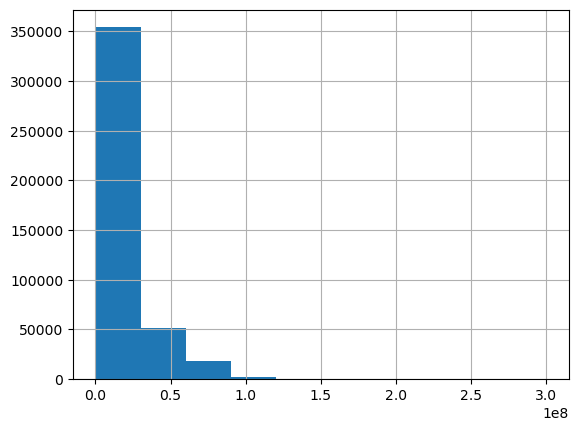

In [248]:
data3['price'].hist()

In [249]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426373 entries, 0 to 436397
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          426373 non-null  float64
 1   raw_content    426373 non-null  object 
 2   location.city  426373 non-null  object 
 3   datetime       426373 non-null  object 
 4   brand          426373 non-null  object 
 5   model          391000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 22.8+ MB


In [250]:
#"eplace the models that are null with 'other'
data3['model'].fillna('others', inplace=True)

C:\Users\sepideh\AppData\Local\Temp\ipykernel_7824\1941488760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data3['model'].fillna('others', inplace=True)


In [251]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426373 entries, 0 to 436397
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          426373 non-null  float64
 1   raw_content    426373 non-null  object 
 2   location.city  426373 non-null  object 
 3   datetime       426373 non-null  object 
 4   brand          426373 non-null  object 
 5   model          426373 non-null  object 
dtypes: float64(1), object(5)
memory usage: 22.8+ MB


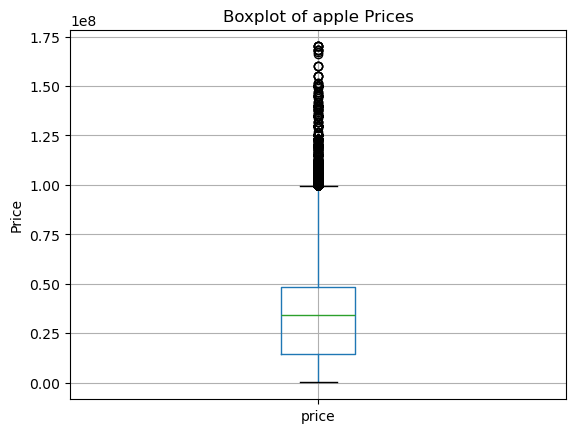

In [253]:
#Display box plot of the 'price' column for the 'apple' brand
import matplotlib.pyplot as plt
data3[data3['brand'] =='apple'].boxplot(column='price')
plt.title('Boxplot of apple Prices')
plt.ylabel('Price')
plt.show()

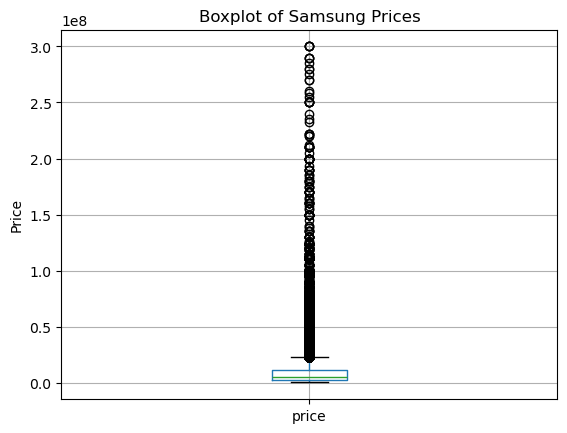

In [254]:
data3[data3['brand'] == 'samsung'].boxplot(column='price')
plt.title('Boxplot of Samsung Prices')
plt.ylabel('Price')
plt.show()

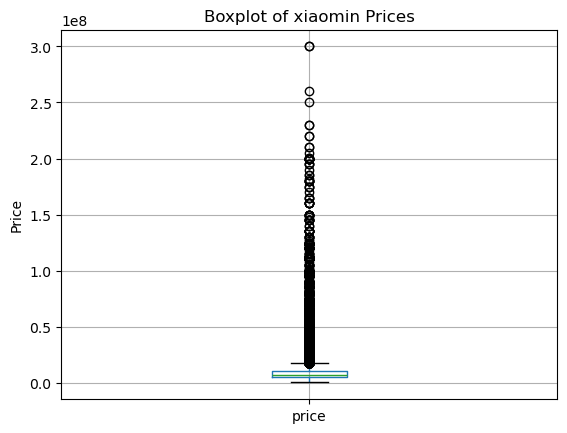

In [255]:
data3[data3['brand']=='xiaomi'].boxplot(column='price')
plt.title('Boxplot of xiaomin Prices')
plt.ylabel('Price')
plt.show()


In [256]:
data3.to_csv('exported_cleaning__3.csv' , index=False, encoding="utf-8-sig")

In [332]:
data4=pd.read_csv('exported_cleaning__3.csv')

<Axes: ylabel='Frequency'>

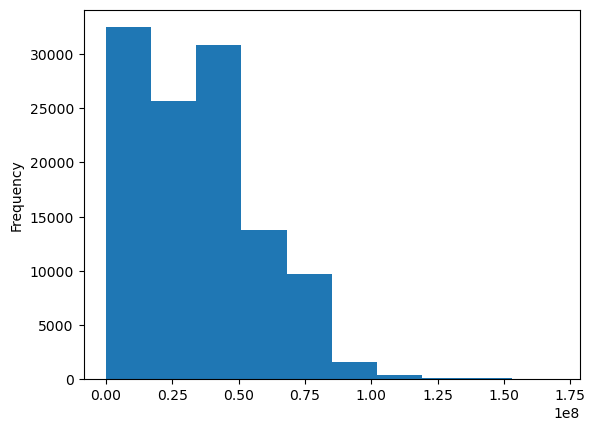

In [333]:
apple_price=data4[data4['brand']=='apple']['price']
apple_price.plot(kind='hist')

In [334]:
#Remove the outliers for the 'Xiaomi' brand using the IQR method.
xiaomi_data=data4[data4['brand']=='xiaomi']
Q1=xiaomi_data['price'].quantile(0.03)
Q3=xiaomi_data['price'].quantile(0.98)
IRQ=Q3-Q1
lower_outlier=Q1-IRQ*1.5
upper_outlier=Q3+IRQ*1.5
outliers_xiaomi=xiaomi_data[(xiaomi_data['price']<lower_outlier) | (xiaomi_data['price']>upper_outlier)]
outliers_xiaomi.head()

,price,raw_content,location.city,datetime,brand,model
1237,"65,000,000",شیائومی 12 Pro ۲۵۶ گیگابایت|موبایل|ایرانشهر|خر...,ایرانشهر,1403-03-01 15:10:08,xiaomi,12 pro
1773,"83,000,000",گوشی شیائومی پوکو ایکس 4 پرو|موبایل|بجنورد|خری...,بجنورد,1403-03-01 20:43:02,xiaomi,others
2217,"80,000,000",شیائومی 13T ۲۵۶ گیگابایت|موبایل|شاهرود|خرید و ...,شاهرود,1403-03-02 06:13:47,xiaomi,13t
2383,"75,000,000",حافظه داخلی ۲۵۶رم۸ گوشی\n|موبایل|بم|خرید و فرو...,بم,1403-03-02 08:39:33,xiaomi,mi 5s
3604,"111,111,112",شیائومی ردمی نوت 10 پرو با حافظهٔ ۱۲۸ گیگابایت...,ساوه,1403-03-02 20:59:28,xiaomi,redmi note 10 pro (india)


In [335]:
pd.set_option('display.float_format', '{:,.0f}'.format)
outliers_xiaomi['price'].describe()

count           627
mean    100,548,397
std      35,789,444
min      59,900,000
25%      75,000,000
50%      97,000,000
75%     111,111,112
max     300,000,000
Name: price, dtype: float64

In [336]:
#Remove the outliers for the 'samsung' brand using the IQR method.
samsung_data=data4[data4['brand']=='samsung']
Q1=samsung_data['price'].quantile(0.03)
Q3=samsung_data['price'].quantile(0.98)
IRQ=Q3-Q1
lower_outlier=Q1-IRQ*1.5
upper_outlier=Q3+IRQ*1.5
outliers_samsung=samsung_data[(samsung_data['price']<lower_outlier) | (samsung_data['price']>upper_outlier)]
outliers_samsung.head()

,price,raw_content,location.city,datetime,brand,model
898,"190,000,000",سامسونگ Galaxy Note20 با حافظهٔ ۲۵۶ گیگابایت|م...,تهران,1403-03-01 11:48:53,samsung,galaxy note20
6948,"180,000,000",سامسونگ Galaxy Note10+ ۲۵۶ گیگابایت|موبایل|تبر...,تبریز,1403-03-04 20:27:54,samsung,galaxy note10+
10628,"300,000,000",وام خرید گوشی سامسونگ S24 ultra ویتنام|موبایل|...,زنجان,1403-03-06 20:18:44,samsung,others
12133,"165,000,000",سامسونگ سامسونگ Galaxy A54 ۱۲۸ گیگابایت|موبایل...,دامغان,1403-03-07 16:33:18,samsung,سامسونگ galaxy a54
21612,"158,000,000",سامسونگ سامسونگ Galaxy A54 ۱۲۸ گیگابایت|موبایل...,تبریز,1403-03-13 01:57:34,samsung,سامسونگ galaxy a54


In [337]:
pd.set_option('display.float_format', '{:,.0f}'.format)
outliers_samsung['price'].describe()

count            94
mean    203,462,274
std      44,773,873
min     150,000,000
25%     170,000,000
50%     196,500,000
75%     230,305,556
max     300,000,000
Name: price, dtype: float64

https://www.digikala.com/search/category-mobile-phone


بالاترین و کمترین قیمت گوشی‌های شیائومی و سامسونگ به شرح زیر است:

**شیائومی:**
- کمترین قیمت: ۵,۲۹۹,۰۰۰ تومان (Xiaomi Redmi A3)
- بالاترین قیمت: ۴۹,۴۹۹,۰۰۰ تومان مان (Xiaomi poco F6 pro) 5

**سامسونگ:**
- کمترین قیمت: ۶,۷۵۰,۰۰۰ تومان (Samsung Galaxy A06)
- بالاترین قیمت: ۱۴۷,۵۲۰,۰۰۰ تومان(Samsung Galaxy Z Fold 6)5 Ultra)

In [338]:
#remove outliers for xiaomi - 627
data4= data4[~data4.index.isin(outliers_xiaomi.index)]

#remove oulliers for samsung - 94
data4=data4[~data4.index.isin(outliers_samsung.index)]


In [339]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425652 entries, 0 to 426372
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          425652 non-null  float64
 1   raw_content    425652 non-null  object 
 2   location.city  425652 non-null  object 
 3   datetime       425652 non-null  object 
 4   brand          425652 non-null  object 
 5   model          425652 non-null  object 
dtypes: float64(1), object(5)
memory usage: 22.7+ MB


In [340]:
data4['price'].describe()

count       425,652
mean     15,153,866
std      19,311,015
min         100,000
25%       3,300,000
50%       7,000,000
75%      18,000,000
max     300,000,000
Name: price, dtype: float64

In [341]:
other_brands=data4[~data4['brand'].isin(['xiaomi','samsung','apple'])]

"To remove outliers for other models, since they were considered in general and to avoid deleting a large amount of data, I removed 5% of the outliers."

In [342]:
Q1=other_brands['price'].quantile(0.3)
Q3=other_brands['price'].quantile(0.98)
IRQ=Q3-Q1
lower_outlier=Q1-IRQ*1.5
upper_outlier=Q3+IRQ*1.5
outliers_otherbrands=other_brands[(other_brands['price']<lower_outlier) | (other_brands['price']>upper_outlier)]

In [343]:
outliers_otherbrands.head()

,price,raw_content,location.city,datetime,brand,model
520,"70,000,000",نوت 11 اپرو ۱۲۸ گیگابایت|موبایل|سوسنگرد|خرید و...,سوسنگرد,1403-03-01 07:26:44,infinix,note 11s
769,"111,111,112",آنر 3C Play ۱۶ گیگابایت|موبایل|بجنورد|خرید و ف...,بجنورد,1403-03-01 10:19:09,honor,3c play
870,"180,000,000",جیونی Elife E6 ۳۲ گیگابایت|موبایل|ایرانشهر|خری...,ایرانشهر,1403-03-01 11:15:33,gionee,elife e6
1507,"150,000,000",گوشی در حد نو تمیز|موبایل|شوش|خرید و فروش سلام...,شوش,1403-03-01 17:47:33,glx,others
3425,"65,000,000",پوکوNFC3X|موبایل|زنجان|خرید و فروش باسلام گوشی...,زنجان,1403-03-02 19:18:22,gigabyte,gsmart arty a3


In [344]:
#remove outliers for other brand 
data4=data4[~data4.index.isin(outliers_otherbrands.index)]


In [345]:
data4['price'].describe()

count       425,180
mean     15,054,880
std      19,032,847
min         100,000
25%       3,300,000
50%       7,000,000
75%      18,000,000
max     170,000,000
Name: price, dtype: float64

In [346]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425180 entries, 0 to 426372
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          425180 non-null  float64
 1   raw_content    425180 non-null  object 
 2   location.city  425180 non-null  object 
 3   datetime       425180 non-null  object 
 4   brand          425180 non-null  object 
 5   model          425180 non-null  object 
dtypes: float64(1), object(5)
memory usage: 22.7+ MB


In [347]:
data4.head()

,price,raw_content,location.city,datetime,brand,model
0,"3,200,000",سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31 20:39:04,samsung,galaxy a22 5g
1,"3,700,000",شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31 20:40:24,xiaomi,redmi note 8
2,"1,111,111",خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31 20:31:18,nokia,5800 xpressmusic
3,"2,300,000",سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31 20:36:08,samsung,galaxy j5 prime
4,"14,000,000",گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31 20:46:02,xiaomi,others


In [351]:
#convert date
from persiantools.jdatetime import JalaliDate
data4["datetime"]= data4["datetime"].apply(
    lambda x: JalaliDate.fromisoformat(x.split()[0]) if isinstance(x, str) else x)
data4["gregorian_date"] = data4["datetime"].apply(lambda x: pd.to_datetime(x.to_gregorian()))
data4["date"] = data4["gregorian_date"].dt.date
data4.head()

,price,raw_content,location.city,datetime,brand,model,gregorian_date,date
0,"3,200,000",سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31,samsung,galaxy a22 5g,2024-05-20,2024-05-20
1,"3,700,000",شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31,xiaomi,redmi note 8,2024-05-20,2024-05-20
2,"1,111,111",خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31,nokia,5800 xpressmusic,2024-05-20,2024-05-20
3,"2,300,000",سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31,samsung,galaxy j5 prime,2024-05-20,2024-05-20
4,"14,000,000",گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31,xiaomi,others,2024-05-20,2024-05-20


In [352]:
data4.drop(columns=["gregorian_date"],inplace=True)
data4.rename(columns={"datetime":"date_shamsi"}, inplace=True)

In [354]:
data4["date"] = pd.to_datetime(data4["date"])

In [357]:
#Convert the prices to strings and remove the decimal values
data4['price']= data4['price'].astype(str).str.split('.').str[0]

In [360]:
#Identify prices of 1 (abnormal prices)
ones_prices=data4[data4['price'].apply(lambda x: set(str(x)) == {'1'})]
ones_prices.head()

,price,raw_content,location.city,date_shamsi,brand,model,date
2,1111111,خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31,nokia,5800 xpressmusic,2024-05-20
320,1111111,سامسونگ Galaxy A10 ۳۲ گیگابایت|موبایل|زنجان|خر...,زنجان,1403-03-01,samsung,galaxy a10,2024-05-21
408,111111,سامسونگ Galaxy S23 Ultra ۵۱۲ گیگابایت|موبایل|ل...,لردگان,1403-03-01,samsung,galaxy s23 ultra,2024-05-21
527,111111,سامسونگ Galaxy A12 ۶۴ گیگابایت|موبایل|لردگان|خ...,لردگان,1403-03-01,samsung,galaxy a12,2024-05-21
845,11111111,اپل iPhone 13 ۱۲۸ گیگابایت|موبایل|بابل|خرید و ...,بابل,1403-03-01,apple,13,2024-05-21


In [359]:
ones_prices['model'].unique()

array(['5800 xpressmusic', 'galaxy a10', 'galaxy s23 ultra', 'galaxy a12',
       '13', 'mi 6c', 'galaxy a01 core', '11t pro', 'others', '1',
       'galaxy a50', 'galaxy a31', '5', 'galaxy s22 ultra 5g',
       'poco m2 pro', 'redmi 13c', 'galaxy j7 pro', 'redmi note 11s',
       '+galaxy s24', 'galaxy a05s', "one touch t'pop", 'se (2020)',
       '8.1 plus', 'ascend g628', 'سامسونگ galaxy a54', 'lumia icon',
       'galaxy m42 5g', 'redmi note 11 pro+', 'redmi 12c',
       'galaxy a53 5g', 'redmi note 12 4g', 'x', 'z92', 'nova y70 plus',
       'galaxy j1', 'galaxy a21s', 'redmi 10a', 'galaxy s24 ultra',
       'galaxy s23 5g', 'poco x3 pro', 'galaxy j5 (2016)', 'poco c40',
       '4', 'galaxy j2', 'redmi note 6 pro', 'سامسونگ galaxy a34',
       'redmi note 10 pro', 'poco x4 pro 5g', 'galaxy note9',
       'galaxy a51', 'note 12 pro 5g', 'galaxy a72 5g',
       'desire 816 dual sim', 'galaxy a20', 'g11', 'redmi note 11 pro 5g',
       'poco x6 pro', '105 (2022)', 'galaxy a13', 'redm

In [361]:
data4['price'] = data4['price'].astype(int)

In [363]:
data4_1=data4[~data4.index.isin(ones_prices.index)]

In [364]:
#Calculate average of the normal prices for each model
mean_prices= data4_1.groupby(['brand', 'model'])['price'].mean()

In [422]:
mean_prices

brand  model                    
acer   acer liquid c1               1,101,389
       acer liquid e1               3,250,000
       acer liquid e2               2,000,000
       acer liquid e3               1,200,000
       acer liquid e3 duo plus      4,950,000
                                      ...    
zte    zte nubia red magic 7       45,000,000
       zte nubia red magic 7 pro   37,375,000
       zte nubia z40s pro          25,000,000
       zte skate acqua                750,000
       zte star 2                     250,000
Name: price, Length: 4309, dtype: float64

In [365]:
#Convert to dictionary.
mean_prices_dict = mean_prices.to_dict()
mean_prices_dict

{('acer', 'acer liquid c1'): 1100000.0,
 ('acer', 'acer liquid e1'): 3250000.0,
 ('acer', 'acer liquid e2'): 2000000.0,
 ('acer', 'acer liquid e3'): 9100000.0,
 ('acer', 'acer liquid e3 duo plus'): 4950000.0,
 ('acer', 'acer liquid e600'): 1200000.0,
 ('acer', 'acer liquid gallant e350'): 5960720.571428572,
 ('acer', 'acer liquid glow e330'): 3361235.9782608696,
 ('acer', 'acer liquid jade'): 100000.0,
 ('acer', 'acer liquid jade 2'): 6000000.0,
 ('acer', 'acer liquid jade primo'): 625000.0,
 ('acer', 'acer liquid s1'): 700000.0,
 ('acer', 'acer liquid z110'): 8890000.0,
 ('acer', 'acer liquid z2'): 725000.0,
 ('acer', 'acer liquid z3'): 3350000.0,
 ('acer', 'acer liquid z320'): 200000.0,
 ('acer', 'acer liquid z530s'): 17000000.0,
 ('acer', 'acer liquid z6'): 5100000.0,
 ('acer', 'acer liquid z6 plus'): 2500000.0,
 ('acer', 'acer liquid z630'): 500000.0,
 ('acer', 'acer liquid z630s'): 2000000.0,
 ('acer', 'liquid c1'): 2484027.75,
 ('acer', 'liquid e1'): 3775000.0,
 ('acer', 'liquid 

In [366]:
# ones_prices replace the value of price with the average per brand and model
ones_prices['price'] = ones_prices.apply(
    lambda row: mean_prices_dict.get((row['brand'], row['model']), row['price']),
    axis=1)

C:\Users\sepideh\AppData\Local\Temp\ipykernel_7824\156942110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones_prices['price'] = ones_prices.apply(


In [367]:
ones_prices.head()

,price,raw_content,location.city,date_shamsi,brand,model,date
2,"1,168,766",خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31,nokia,5800 xpressmusic,2024-05-20
320,"2,680,361",سامسونگ Galaxy A10 ۳۲ گیگابایت|موبایل|زنجان|خر...,زنجان,1403-03-01,samsung,galaxy a10,2024-05-21
408,"42,598,157",سامسونگ Galaxy S23 Ultra ۵۱۲ گیگابایت|موبایل|ل...,لردگان,1403-03-01,samsung,galaxy s23 ultra,2024-05-21
527,"4,482,379",سامسونگ Galaxy A12 ۶۴ گیگابایت|موبایل|لردگان|خ...,لردگان,1403-03-01,samsung,galaxy a12,2024-05-21
845,"39,030,042",اپل iPhone 13 ۱۲۸ گیگابایت|موبایل|بابل|خرید و ...,بابل,1403-03-01,apple,13,2024-05-21


In [368]:
# get index ones_prices
ones_prices_index = ones_prices.index

# Assign one_prices to dataset
data4.loc[ones_prices_index, 'price']= ones_prices['price']


C:\Users\sepideh\AppData\Local\Temp\ipykernel_7824\2442893996.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1168765.9266409266 2680360.681331748 42598156.66077537 ...
 15413647.28746427 19558193.27576923 5314653.850815134]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data4.loc[ones_prices_index, 'price']= ones_prices['price']


In [369]:
data4.to_csv('exported_cleaning__4.csv' , index=False, encoding="utf-8-sig")

In [370]:
data5=pd.read_csv('exported_cleaning__4.csv')

In [371]:
#Remove spaces from "city" column.
data5['location.city'] = data5['location.city'].str.strip()

In [372]:
data5['location.city'].unique().tolist()

['اهواز',
 'مشهد',
 'تربت جام',
 'دماوند',
 'تهران',
 'بوشهر',
 'بندر کنگان',
 'نظرآباد',
 'ایلام',
 'کاشان',
 'نجف\u200cآباد',
 'اصفهان',
 'میانه',
 'مرند',
 'مراغه',
 'تبریز',
 'رباط\u200cکریم',
 'ورامین',
 'نوشهر',
 'بندرعباس',
 'کرمانشاه',
 'رشت',
 'گنبد کاووس',
 'دوگنبدان',
 'آبیک',
 'بم',
 'کرمان',
 'شیراز',
 'سنندج',
 'زنجان',
 'بجنورد',
 'نیشابور',
 'کرج',
 'ساوه',
 'اسدآباد',
 'میناب',
 'قشم',
 'محلات',
 'کوهدشت',
 'دورود',
 'خرم\u200cآباد',
 'بروجرد',
 'الیگودرز',
 'صومعه\u200cسرا',
 'گرگان',
 'علی\u200cآباد کتول',
 'کنگاور',
 'یاسوج',
 'اسلام\u200c\u200cآباد غرب',
 'مریوان',
 'الوند',
 'بانه',
 'فیروزآباد',
 'لامرد',
 'زابل',
 'چابهار',
 'زاهدان',
 'شوشتر',
 'رامهرمز',
 'بهبهان',
 'ایذه',
 'بندر ماهشهر',
 'شیروان',
 'اندیمشک',
 'بیرجند',
 'لردگان',
 'گلستان',
 'اردبیل',
 'بندر گناوه',
 'یزد',
 'کیش',
 'چالوس',
 'رامسر',
 'لاهیجان',
 'لنگرود',
 'تالش',
 'آستانه اشرفیه',
 'جوانرود',
 'رفسنجان',
 'همدان',
 'اراک',
 'بابلسر',
 'سرپل ذهاب',
 'قروه',
 'قزوین',
 'ایرانشهر',
 'دزفول

In [373]:
import re
#function for clean city_name
def clean_city_name(city_name):
    return re.sub(r'[^ا-ی\s]', '', city_name) 
    
data5['location.city'] = data5['location.city'].apply(clean_city_name)

In [375]:
data5['location.city'].unique().tolist()

['اهواز',
 'مشهد',
 'تربت جام',
 'دماوند',
 'تهران',
 'بوشهر',
 'بندر کنگان',
 'نظرباد',
 'ایلام',
 'کاشان',
 'نجفباد',
 'اصفهان',
 'میانه',
 'مرند',
 'مراغه',
 'تبریز',
 'رباطکریم',
 'ورامین',
 'نوشهر',
 'بندرعباس',
 'کرمانشاه',
 'رشت',
 'گنبد کاووس',
 'دوگنبدان',
 'بیک',
 'بم',
 'کرمان',
 'شیراز',
 'سنندج',
 'زنجان',
 'بجنورد',
 'نیشابور',
 'کرج',
 'ساوه',
 'اسدباد',
 'میناب',
 'قشم',
 'محلات',
 'کوهدشت',
 'دورود',
 'خرمباد',
 'بروجرد',
 'الیگودرز',
 'صومعهسرا',
 'گرگان',
 'علیباد کتول',
 'کنگاور',
 'یاسوج',
 'اسلامباد غرب',
 'مریوان',
 'الوند',
 'بانه',
 'فیروزباد',
 'لامرد',
 'زابل',
 'چابهار',
 'زاهدان',
 'شوشتر',
 'رامهرمز',
 'بهبهان',
 'ایذه',
 'بندر ماهشهر',
 'شیروان',
 'اندیمشک',
 'بیرجند',
 'لردگان',
 'گلستان',
 'اردبیل',
 'بندر گناوه',
 'یزد',
 'کیش',
 'چالوس',
 'رامسر',
 'لاهیجان',
 'لنگرود',
 'تالش',
 'ستانه اشرفیه',
 'جوانرود',
 'رفسنجان',
 'همدان',
 'اراک',
 'بابلسر',
 'سرپل ذهاب',
 'قروه',
 'قزوین',
 'ایرانشهر',
 'دزفول',
 'بندر امام خمینی',
 'خرمشهر',
 'چناران',
 'شهرک

In [376]:
data5.head()

,price,raw_content,location.city,date_shamsi,brand,model,date
0,"3,200,000",سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31,samsung,galaxy a22 5g,2024-05-20
1,"3,700,000",شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31,xiaomi,redmi note 8,2024-05-20
2,"1,168,766",خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31,nokia,5800 xpressmusic,2024-05-20
3,"2,300,000",سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31,samsung,galaxy j5 prime,2024-05-20
4,"14,000,000",گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31,xiaomi,others,2024-05-20


In [377]:
data5['price'].describe()

count       425,180
mean     15,114,481
std      19,031,737
min         100,000
25%       3,450,000
50%       7,000,000
75%      18,000,000
max     170,000,000
Name: price, dtype: float64

In [378]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425180 entries, 0 to 425179
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          425180 non-null  float64
 1   raw_content    425180 non-null  object 
 2   location.city  425180 non-null  object 
 3   date_shamsi    425180 non-null  object 
 4   brand          425180 non-null  object 
 5   model          425180 non-null  object 
 6   date           425180 non-null  object 
dtypes: float64(1), object(6)
memory usage: 22.7+ MB


In [381]:
from datetime import datetime

In [383]:
print(data5['date'].unique())

['2024-05-20' '2024-05-21' '2024-05-22' '2024-05-23' '2024-05-24'
 '2024-05-25' '2024-05-26' '2024-05-27' '2024-05-28' '2024-05-29'
 '2024-05-30' '2024-05-31' '2024-06-01' '2024-06-02' '2024-06-03'
 '2024-06-04' '2024-06-05' '2024-06-06' '2024-06-07' '2024-06-08'
 '2024-06-09' '2024-06-10' '2024-06-11' '2024-06-12' '2024-06-13'
 '2024-06-14' '2024-06-15' '2024-06-16' '2024-06-17' '2024-06-18'
 '2024-06-19' '2024-06-20' '2024-06-21' '2024-06-22' '2024-06-23'
 '2024-06-24' '2024-06-25' '2024-06-26' '2024-06-27' '2024-06-28'
 '2024-06-29' '2024-06-30' '2024-07-01' '2024-07-02' '2024-07-03'
 '2024-07-04' '2024-07-05' '2024-07-06' '2024-07-07' '2024-07-08'
 '2024-07-09' '2024-07-10' '2024-07-11' '2024-07-12' '2024-07-13'
 '2024-07-14' '2024-07-15' '2024-07-16' '2024-07-17' '2024-07-18'
 '2024-07-19' '2024-07-20' '2024-07-21' '2024-07-22' '2024-07-23'
 '2024-07-24' '2024-07-25' '2024-07-26' '2024-07-27' '2024-07-28'
 '2024-07-29' '2024-08-06' '2024-08-05' '2024-08-03' '2024-08-07'
 '2024-08-

In [384]:
data4['date'] = data4['date'].apply(lambda x: jdatetime.datetime.strptime(x, "%Y/%m/%d").togregorian() if isinstance(x, str) else x)
data4['date'] = pd.to_datetime(data4['date'])

In [385]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425180 entries, 0 to 426372
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   price          425180 non-null  object        
 1   raw_content    425180 non-null  object        
 2   location.city  425180 non-null  object        
 3   date_shamsi    425180 non-null  object        
 4   brand          425180 non-null  object        
 5   model          425180 non-null  object        
 6   date           425180 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 42.1+ MB


In [386]:
data4.head()

,price,raw_content,location.city,date_shamsi,brand,model,date
0,3200000,سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,1403-02-31,samsung,galaxy a22 5g,2024-05-20
1,3700000,شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,1403-02-31,xiaomi,redmi note 8,2024-05-20
2,"1,168,766",خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,1403-02-31,nokia,5800 xpressmusic,2024-05-20
3,2300000,سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,1403-02-31,samsung,galaxy j5 prime,2024-05-20
4,14000000,گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,1403-02-31,xiaomi,others,2024-05-20


In [388]:
new_order=['model','brand','raw_content', 'location.city' , 'date','date_shamsi','price']
df=data4[new_order]

In [389]:
df.head()

,model,brand,raw_content,location.city,date,date_shamsi,price
0,galaxy a22 5g,samsung,سامسونگ Galaxy A22 5G ۱۲۸ گیگابایت|موبایل|اهوا...,اهواز,2024-05-20,1403-02-31,3200000
1,redmi note 8,xiaomi,شیائومی Redmi Note 8 مشکی|موبایل|مشهد، محله سر...,مشهد,2024-05-20,1403-02-31,3700000
2,5800 xpressmusic,nokia,خرید برد خراب ضایعاتی موبایل به صورت کیلیویی|م...,تربت جام,2024-05-20,1403-02-31,"1,168,766"
3,galaxy j5 prime,samsung,سامسونگ Galaxy J5 Prime ۱۶ گیگابایت|موبایل|دما...,دماوند,2024-05-20,1403-02-31,2300000
4,others,xiaomi,گوشی نوت 13 پرو|موبایل|تهران، هاشم‌آباد|خرید و...,تهران,2024-05-20,1403-02-31,14000000


In [390]:
df.to_csv('exported_final__df.csv' , index=False, encoding="utf-8-sig")

In [391]:
df.to_excel('exported_final_df.xlsx', index=False)